In [1]:
import pandas as pd

In [2]:
delany_with_descriptors_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
delaney_with_descriptors_df = pd.read_csv(delany_with_descriptors_url)
delaney_with_descriptors_df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [5]:
X = delaney_with_descriptors_df.drop(['logS'], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [7]:
Y = delaney_with_descriptors_df.iloc[:, -1]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

# Linear Regression Model

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression()

In [10]:
Y_pred = model.predict(X)

In [11]:
# model performance
print('Slope:' , model.coef_)
print('Intercept:', model.intercept_)
print('R^2 score:', r2_score(Y, Y_pred))
print('Mean squared error:', mean_squared_error(Y, Y_pred))


Slope: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.25650068309971674
R^2 score: 0.770099670806285
Mean squared error: 1.0096023011483513


In [12]:
# model equation
print('LogS = %.2f %.2f LogP %.4f MW %.2f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))

LogS = 0.26 -0.74 LogP -0.0066 MW 0.00 RB -0.42 AP


# Data Visualization

In [13]:
import numpy as np
import matplotlib.pyplot as plt

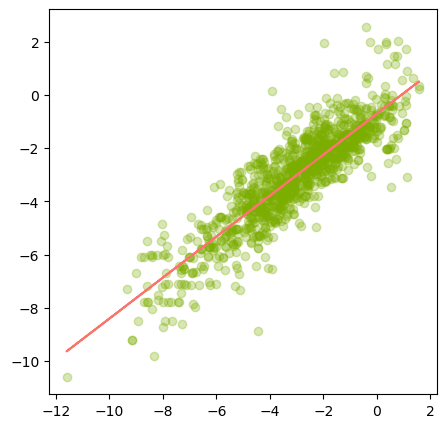

In [15]:
# Scatter plot experimental vs predicted logS
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# insert the line of best fit
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)
plt.plot(Y,p(Y),"#F8766D")

In [16]:
# pickle the model
import pickle
pickle.dump(model, open('solubility_model.pkl', 'wb'))